# `plot_solutions` Solution Comparison Tool

This tool plots the solution vectors (i.e. final values of optimisation parameters) for different runs of PROCESS. This allows visual comparisons of different solution points.

It can use different intra-solution optimisation parameter normalisations (e.g. initial value, parameter range) and inter-solution normalisations (e.g. normalise to a certain solution).

### Known Limitations

- The solution vectors (optimisation parameter values at the solution) currently plotted are normalised to the initial point (from the `IN.DAT`) of each solution: each element of the vector is the $x_{final}/x_{initial}$, the `xcmxxx` values in the `MFILE.DAT`. This allows all optimisation parameters to be plotted on the same axis, showing the relative changes from their initial values across multiple solutions.
- Solutions being plotted together must also have the same optimisation parameters.
- The solutions plotted in this example are fictitious.

In [1]:
# Reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%autoreload 2

from pathlib import Path

from process.io.plot_solutions import RunMetadata, plot_mfile_solutions

## Plot single solution

Plot a single solution, showing optimisation parameters normalised to their initial values.

,tag,minmax,norm_objf,itvar001_name,xcm001,itvar002_name,xcm002,itvar003_name,xcm003,itvar004_name,...,itvar038_name,xcm038,itvar039_name,xcm039,itvar040_name,xcm040,itvar041_name,xcm041,itvar042_name,xcm042
0,old baseline solution,-14.0,-0.37947,bt,1.0355,rmajor,1.0,te,1.054,beta,...,oh_steel_frac,1.2337,foh_stress,1.1482,fimp(13),1.0682,fne0,0.99397,fncycle,1.0


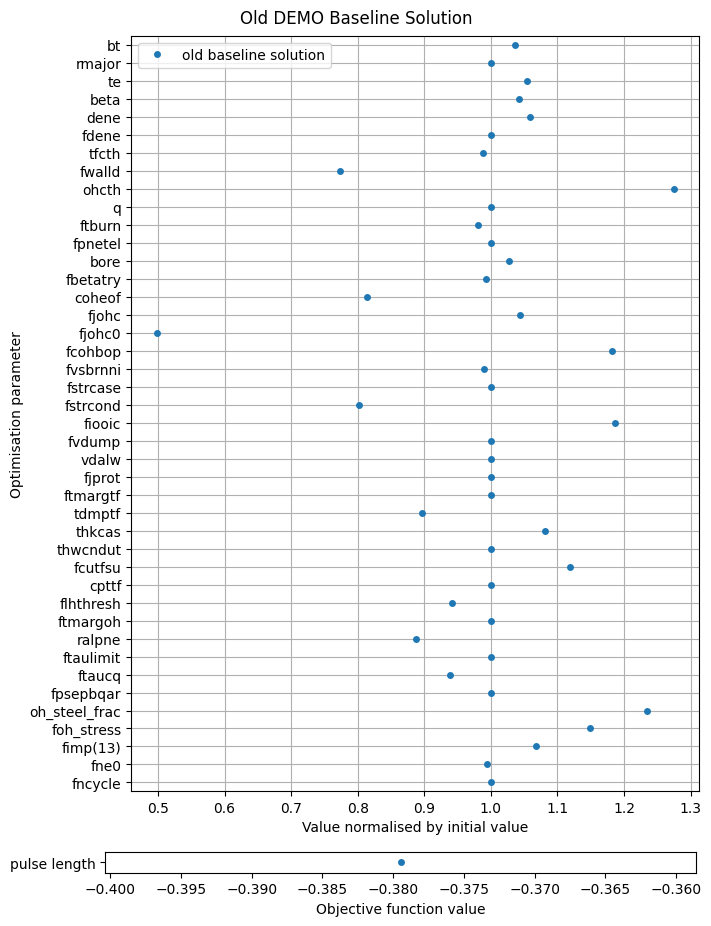

In [2]:
data_dir = Path("/home/apearce/process/process_cs/issue-3354")
runs_metadata = [
    RunMetadata(data_dir / "old_baseline_solution/older/A_28_R_86_350MW_MFILE.DAT", "old baseline solution"),
]

# Figure and dataframe returned for optional further modification
fig1, df1 = plot_mfile_solutions(
    runs_metadata=runs_metadata,
    plot_title="Old DEMO Baseline Solution",
)
df1

## Plot two solutions

Plot two MFILEs together, showing normalised values of the optimisation parameters at the solution points, as well as the objective function values.

,tag,minmax,norm_objf,itvar001_name,xcm001,itvar002_name,xcm002,itvar003_name,xcm003,itvar004_name,...,xcm038,itvar039_name,xcm039,itvar040_name,xcm040,itvar041_name,xcm041,itvar042_name,xcm042,objf_name
0,old baseline solution,-14.0,-0.379470,bt,1.035500,rmajor,1.0,te,1.054000,beta,...,1.233700,foh_stress,1.148200,fimp(13),1.068200,fne0,0.99397,fncycle,1.0,NaN
1,Middle baseline solution,-14.0,-0.379593,bt,1.040395,rmajor,1.0,te,1.060938,beta,...,1.253366,fimp(13),1.106365,fne0,0.993967,fncycle,1.00000,NaN,NaN,pulse length
2,New baseline solution,-14.0,-0.310597,bt,1.060171,rmajor,1.0,te,1.093963,beta,...,1.179461,fimp(13),1.176066,fne0,0.993967,fncycle,1.00000,NaN,NaN,pulse length


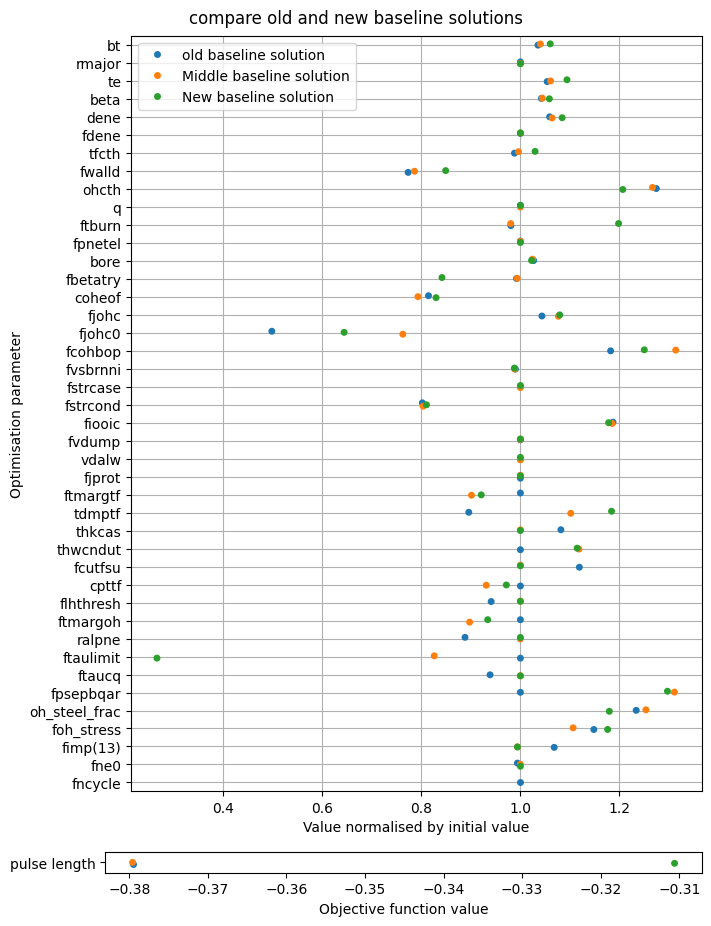

In [3]:
runs_metadata = [
    RunMetadata(data_dir / "old_baseline_solution/older/A_28_R_86_350MW_MFILE.DAT", "old baseline solution"),
    RunMetadata(data_dir / "VV_model_without_new_changes/A_28_R_86_350MW_MFILE_NEW.DAT", "Middle baseline solution"),
    RunMetadata(data_dir / "A_28_R_86_350MW_MFILE.DAT", "New baseline solution"),
]

fig2, df2 = plot_mfile_solutions(
    runs_metadata=runs_metadata,
    plot_title="compare old and new baseline solutions",
)
df2

## Plot one solution normalised to another

Normalised differences, relative to the a given solution, can also be plotted:

In [10]:
fig3, df3 = plot_mfile_solutions(
    runs_metadata=runs_metadata,
    plot_title="Large tokamak 2 solution, relative to large tokamak 1",
    normalising_tag="large tokamak 1",
)
df3

ValueError: Unable to coerce to DataFrame, shape must be (2, 41): given (0, 41)

## Plot multiple solutions normalised by one

Plot two MFILEs, normalised by a third MFILE.

,tag,objf_name,norm_objf,itvar001_name,xcm001,itvar002_name,xcm002,itvar003_name,xcm003,itvar004_name,...,itvar041_name,xcm041,itvar042_name,xcm042,itvar043_name,xcm043,itvar044_name,xcm044,itvar045_name,xcm045
0,large tokamak 1,major radius,1.60,beta,1.1216,dene,1.0756,fwalld,0.50758,ffuspow,...,cpttf,1.3815,ralpne,0.83954,oh_steel_frac,0.64835,fimp(13),1.5039,dr_tf_wp,1.0083
1,large tokamak 2,major radius,1.63,beta,1.3216,dene,1.0756,fwalld,0.51758,ffuspow,...,cpttf,1.3815,ralpne,0.83954,oh_steel_frac,0.64835,fimp(13),1.5039,dr_tf_wp,1.1083
2,large tokamak 3,major radius,1.50,beta,1.1216,dene,1.0756,fwalld,0.50758,ffuspow,...,cpttf,1.3815,ralpne,0.83954,oh_steel_frac,0.64835,fimp(13),1.5039,dr_tf_wp,1.0083


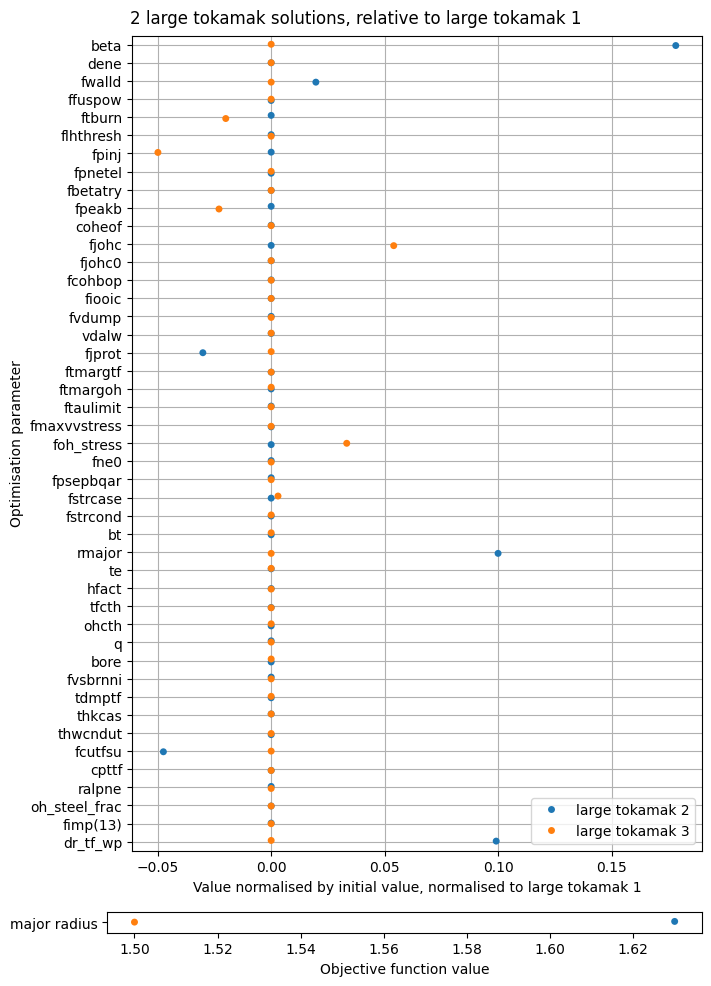

In [5]:
runs_metadata = [
    RunMetadata(data_dir / "large_tokamak_1_MFILE.DAT", "large tokamak 1"),
    RunMetadata(data_dir / "large_tokamak_2_MFILE.DAT", "large tokamak 2"),
    RunMetadata(data_dir / "large_tokamak_3_MFILE.DAT", "large tokamak 3"),
]

fig4, df4 = plot_mfile_solutions(
    runs_metadata,
    "2 large tokamak solutions, relative to large tokamak 1",
    normalising_tag="large tokamak 1",
)
df4

## RMS Errors

Plot RMS errors of multiple solutions relative to a reference solution.

,tag,objf_name,norm_objf,itvar001_name,xcm001,itvar002_name,xcm002,itvar003_name,xcm003,itvar004_name,...,itvar041_name,xcm041,itvar042_name,xcm042,itvar043_name,xcm043,itvar044_name,xcm044,itvar045_name,xcm045
0,large tokamak 1,major radius,1.60,beta,1.1216,dene,1.0756,fwalld,0.50758,ffuspow,...,cpttf,1.3815,ralpne,0.83954,oh_steel_frac,0.64835,fimp(13),1.5039,dr_tf_wp,1.0083
1,large tokamak 2,major radius,1.63,beta,1.3216,dene,1.0756,fwalld,0.51758,ffuspow,...,cpttf,1.3815,ralpne,0.83954,oh_steel_frac,0.64835,fimp(13),1.5039,dr_tf_wp,1.1083
2,large tokamak 3,major radius,1.50,beta,1.1216,dene,1.0756,fwalld,0.50758,ffuspow,...,cpttf,1.3815,ralpne,0.83954,oh_steel_frac,0.64835,fimp(13),1.5039,dr_tf_wp,1.0083
3,large tokamak 4,major radius,1.52,beta,1.1216,dene,1.0756,fwalld,0.50758,ffuspow,...,cpttf,1.3815,ralpne,0.83954,oh_steel_frac,0.64835,fimp(13),1.5039,dr_tf_wp,1.0083


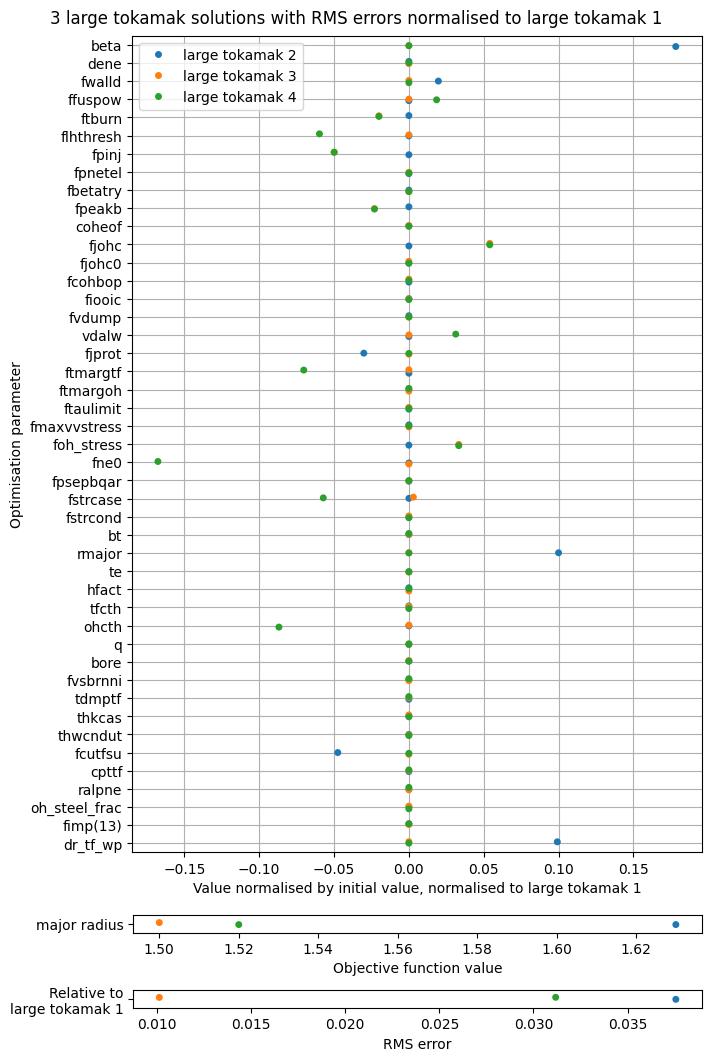

In [6]:
runs_metadata = [
    RunMetadata(data_dir / "large_tokamak_1_MFILE.DAT", "large tokamak 1"),
    RunMetadata(data_dir / "large_tokamak_2_MFILE.DAT", "large tokamak 2"),
    RunMetadata(data_dir / "large_tokamak_3_MFILE.DAT", "large tokamak 3"),
    RunMetadata(data_dir / "large_tokamak_4_MFILE.DAT", "large tokamak 4"),
]

fig5, df5 = plot_mfile_solutions(
    runs_metadata,
    "3 large tokamak solutions with RMS errors normalised to large tokamak 1",
    normalising_tag="large tokamak 1",
    rmse=True,
)
df5

## Solutions normalised by range

Use `nitvar` values instead; the solution optimisation parameters are normalised to the range of their upper and lower bounds.

,tag,objf_name,norm_objf,itvar001_name,nitvar001,itvar002_name,nitvar002,itvar003_name,nitvar003,itvar004_name,...,itvar041_name,nitvar041,itvar042_name,nitvar042,itvar043_name,nitvar043,itvar044_name,nitvar044,itvar045_name,nitvar045
0,large tokamak 1,major radius,1.60,beta,0.032681,dene,0.071381,fwalld,0.50709,ffuspow,...,cpttf,0.99182,ralpne,0.67908,oh_steel_frac,0.5455,fimp(13),0.057148,dr_tf_wp,0.0651
1,large tokamak 2,major radius,1.63,beta,0.042681,dene,0.071381,fwalld,0.70709,ffuspow,...,cpttf,0.99182,ralpne,0.67908,oh_steel_frac,0.5455,fimp(13),0.057148,dr_tf_wp,0.0651
2,large tokamak 3,major radius,1.50,beta,0.022681,dene,0.071381,fwalld,0.50709,ffuspow,...,cpttf,0.99182,ralpne,0.67908,oh_steel_frac,0.5455,fimp(13),0.057148,dr_tf_wp,0.0651
3,large tokamak 4,major radius,1.52,beta,0.032681,dene,0.071381,fwalld,0.40709,ffuspow,...,cpttf,0.99182,ralpne,0.67908,oh_steel_frac,0.5455,fimp(13),0.057148,dr_tf_wp,0.0651


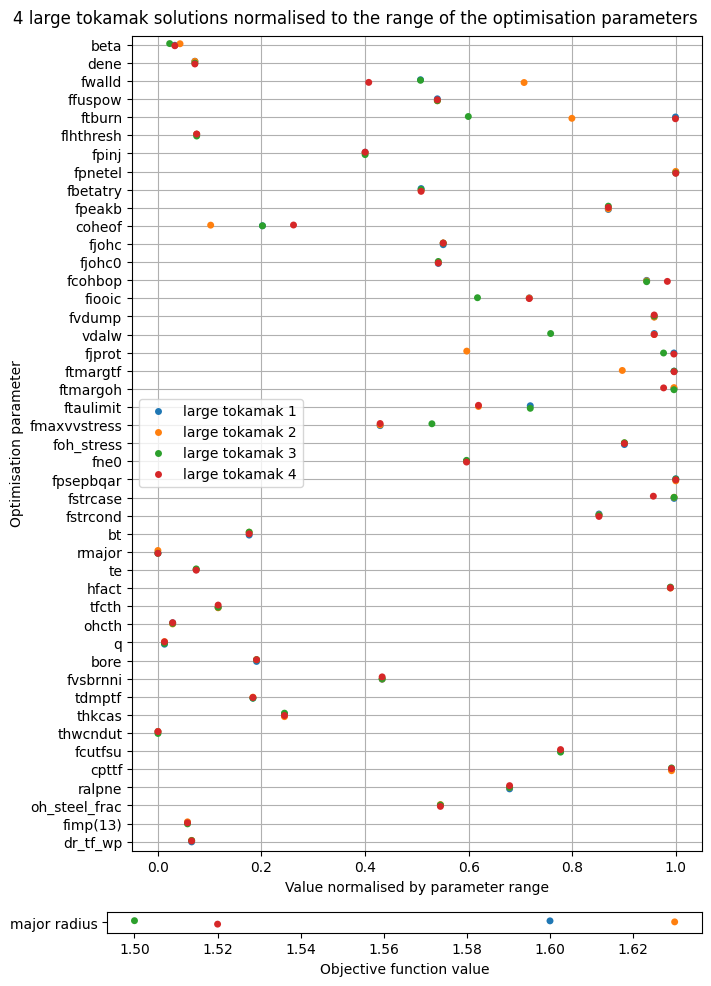

In [7]:
runs_metadata = [
    RunMetadata(data_dir / "large_tokamak_1_MFILE.DAT", "large tokamak 1"),
    RunMetadata(data_dir / "large_tokamak_2_MFILE.DAT", "large tokamak 2"),
    RunMetadata(data_dir / "large_tokamak_3_MFILE.DAT", "large tokamak 3"),
    RunMetadata(data_dir / "large_tokamak_4_MFILE.DAT", "large tokamak 4"),
]

fig6, df6 = plot_mfile_solutions(
    runs_metadata,
    "4 large tokamak solutions normalised to the range of the optimisation parameters",
    normalisation_type="range",
)
df6

## Actual values

,tag,objf_name,norm_objf,itvar001_name,itvar001,itvar002_name,itvar002,itvar003_name,itvar003,itvar004_name,...,itvar041_name,itvar041,itvar042_name,itvar042,itvar043_name,itvar043,itvar044_name,itvar044,itvar045_name,itvar045
0,large tokamak 1,major radius,1.60,beta,0.033648,dene,8.066700e+19,fwalld,0.50758,ffuspow,...,cpttf,89795.0,ralpne,0.083954,oh_steel_frac,0.51868,fimp(13),0.000571,dr_tf_wp,0.50416
1,large tokamak 2,major radius,1.63,beta,0.034648,dene,8.056700e+19,fwalld,0.50258,ffuspow,...,cpttf,89795.0,ralpne,0.083954,oh_steel_frac,0.51868,fimp(13),0.000571,dr_tf_wp,0.50416
2,large tokamak 3,major radius,1.50,beta,0.033648,dene,8.066700e+19,fwalld,0.50758,ffuspow,...,cpttf,88795.0,ralpne,0.081954,oh_steel_frac,0.52868,fimp(13),0.000531,dr_tf_wp,0.57416
3,large tokamak 4,major radius,1.52,beta,0.037648,dene,8.366700e+19,fwalld,0.55758,ffuspow,...,cpttf,89795.0,ralpne,0.083954,oh_steel_frac,0.51868,fimp(13),0.000571,dr_tf_wp,0.50416


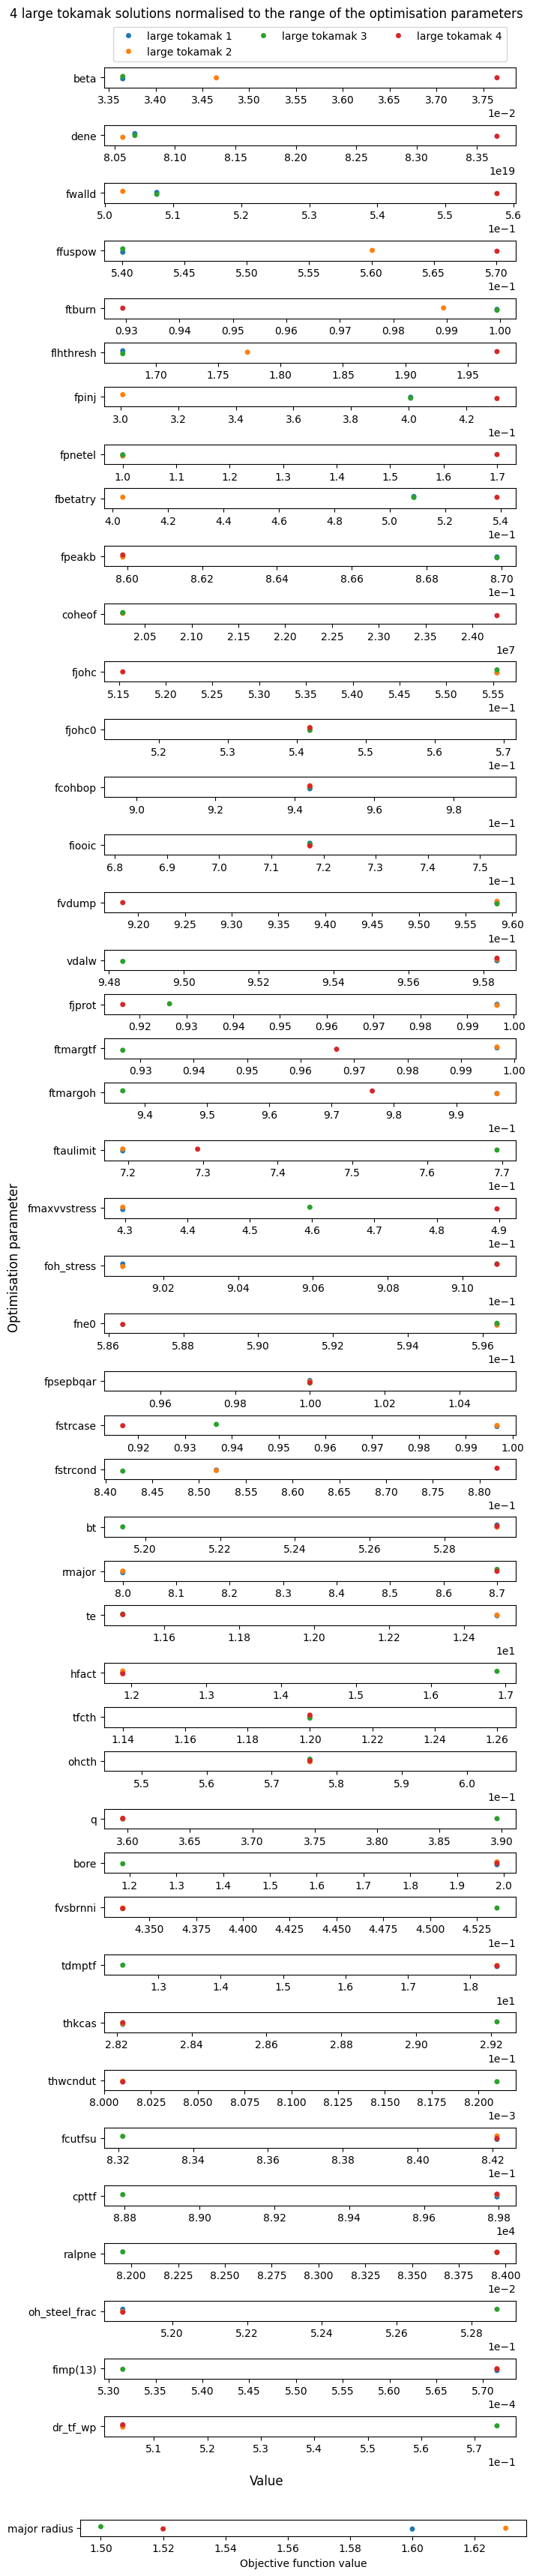

In [8]:
runs_metadata = [
    RunMetadata(data_dir / "large_tokamak_1_MFILE.DAT", "large tokamak 1"),
    RunMetadata(data_dir / "large_tokamak_2_MFILE.DAT", "large tokamak 2"),
    RunMetadata(data_dir / "large_tokamak_3_MFILE.DAT", "large tokamak 3"),
    RunMetadata(data_dir / "large_tokamak_4_MFILE.DAT", "large tokamak 4"),
]

fig7, df7 = plot_mfile_solutions(
    runs_metadata,
    "4 large tokamak solutions normalised to the range of the optimisation parameters",
    normalisation_type=None,
)
df7